In [1]:
import pandas

input_dataframe = pandas.read_csv("train.csv")

In [2]:
labels = input_dataframe['Survived']

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
input_dataframe["Embarked"] = le.fit_transform(input_dataframe["Embarked"].astype(str))
input_dataframe["Cabin"] = le.fit_transform(input_dataframe["Cabin"].astype(str))
input_dataframe["Sex"] = le.fit_transform(input_dataframe["Sex"].astype(str))
input_dataframe["Age"] = input_dataframe["Age"].fillna(-1)
input_dataframe.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2


In [4]:
matX = input_dataframe[["Pclass","Sex", "Age", "SibSp", "Parch","Fare", "Cabin", "Embarked"]]
matX.head(4)             

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,147,2
1,1,0,38.0,1,0,71.2833,81,0
2,3,0,26.0,0,0,7.9250,147,2
3,1,0,35.0,1,0,53.1000,55,2


In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(matX, labels)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
test_dataframe = pandas.read_csv("test.csv")

In [7]:
test_dataframe["Embarked"] = le.fit_transform(test_dataframe["Embarked"].astype(str))
test_dataframe["Cabin"] = le.fit_transform(test_dataframe["Cabin"].astype(str))
test_dataframe["Sex"] = le.fit_transform(test_dataframe["Sex"].astype(str))
test_dataframe["Age"] = test_dataframe["Age"].fillna(-1)
test_dataframe["Fare"] = test_dataframe["Age"].fillna(-1)
test_dataframe.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,34.5,76,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,47.0,76,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,62.0,76,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,27.0,76,2


In [8]:
matTest = test_dataframe[["Pclass","Sex", "Age", "SibSp", "Parch","Fare", "Cabin", "Embarked"]]
matTest.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,34.5,76,1
1,3,0,47.0,1,0,47.0,76,2
2,2,1,62.0,0,0,62.0,76,1
3,3,1,27.0,0,0,27.0,76,2


In [9]:
matTest.shape

(418, 8)

In [10]:
predicted_labels = clf.predict(matTest)

In [11]:
test_dataframe['PassengerId'].shape

(418,)

In [12]:
predicted_labels.shape

(418,)

In [13]:
import numpy as np
array = np.array([test_dataframe['PassengerId'], predicted_labels])
result = pandas.DataFrame(array.T, columns=['PassengerId', "Survived"])
# columns=['PassengerId', 'Survived']

In [14]:
result.to_csv('submissions/regression_submission.csv',index=False)

In [15]:
"Random forest"

'Random forest'

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(matX, labels)
predicted_labels_rf = clf.predict(matTest)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
array = np.array([test_dataframe['PassengerId'], predicted_labels_rf])
result_random_forest = pandas.DataFrame(array.T, columns=['PassengerId', "Survived"])

In [18]:
result_random_forest.to_csv('submissions/random_forest.csv',index=False)

In [ ]:
matX = input_dataframe[["Pclass","Sex", "Age", "SibSp", "Parch","Fare", "Cabin", "Embarked"]]

In [ ]:
from sklearn import model_selection
labels = input_dataframe['Survived']
train, test, labels_train, labels_test = model_selection.train_test_split(matX, labels, random_state = 0)

Trying out different approach!

The feature engeneering: 

In [19]:
input_dataframe = pandas.read_csv("train.csv")

*Fill in the missing parts with median and modes:*

- complete missing age with median
- complete missing fare with median
- complete missing fare with median
- dropped columns: **'PassengerId','Cabin', 'Ticket'** as in the previous part 
    

In [20]:
input_dataframe['Age'].fillna(input_dataframe['Age'].median(), inplace = True)
input_dataframe['Embarked'].fillna(input_dataframe['Embarked'].mode()[0], inplace = True)
input_dataframe['Fare'].fillna(input_dataframe['Fare'].median(), inplace = True)

In [69]:
import seaborn as sns
sns.__version__
!pip show seaborn #should be 0.11.0

Name: seaborn
Version: 0.11.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /anaconda3/lib/python3.7/site-packages
Requires: scipy, matplotlib, numpy, pandas
Required-by: 


## Here comes the plotting part - we want to get the feel for the data

# Barplots

Take a look at the https://seaborn.pydata.org/tutorial/categorical.html#plotting-wide-form-data and look at the barplots:

In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars

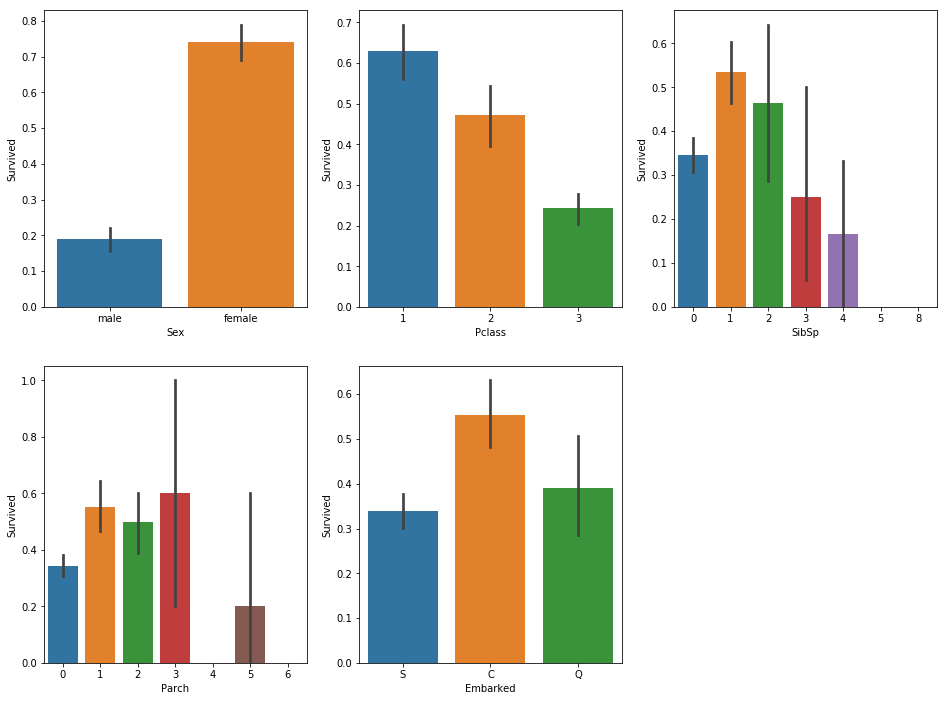

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, saxis = plt.subplots(2, 3, figsize=(16,12))
sns.barplot(x="Sex", y="Survived", data=input_dataframe, ax = saxis[0,0]);
sns.barplot(x="Pclass", y="Survived", data=input_dataframe, ax = saxis[0,1]);
sns.barplot(x="SibSp", y="Survived", data=input_dataframe, ax = saxis[0,2]);
sns.barplot(x="Parch", y="Survived", data=input_dataframe, ax = saxis[1,0]);
sns.barplot(x="Embarked", y="Survived", data=input_dataframe, ax = saxis[1,1]);
# if we don't wanna show some plot, we can set the axis off
#sns.barplot(x="Survived", y="Age", data=input_dataframe, ax = saxis[1,2]);
saxis[1,2].set_axis_off()

- Yeah girls are the total survivors :)
- So the better the class, the higher is the probability to survive
- Whiskers indicate variability outside the upper and lower quartiles -> "SibSp" is not always conclusive, i.e. SibSp variability is too high

# Box plots

Let's take a look at the familiar **boxplot()**. This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

Unlike other sns plots *catplot* generates a fig not an axes. That's why to fix such weird behavior we need to use plt.close() after each catplot execution

A related function, **boxenplot()**, draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets.
#### Note: in many cases we can use hue="feature" to plot with highlighting it

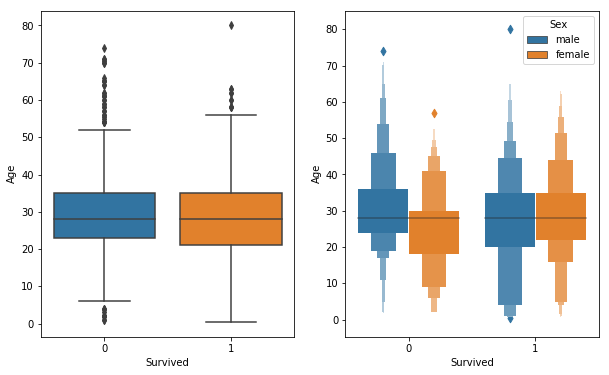

In [102]:
fig, saxis = plt.subplots(1, 2, figsize=(10,6))
### box plot
sns.catplot(x = 'Survived', y ="Age" ,  data=input_dataframe, kind="box", ax = saxis[0]);
plt.close()
### boxenplot
sns.catplot(x = 'Survived', y ="Age", hue="Sex",  data=input_dataframe, kind="boxen",ax = saxis[1]);
plt.close()

# Categorical Scatterplots

Unlike other sns plots catplot generates a fig not an axes. That's why to fix such weird behavior we need to use plt.close() after each catplot execution

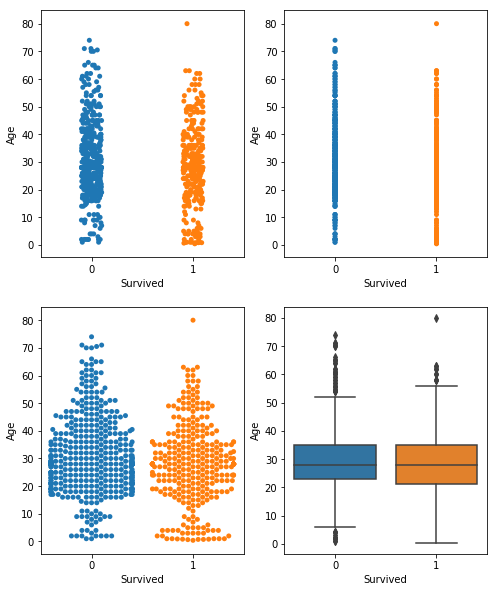

In [86]:
fig, saxis = plt.subplots(2, 2, figsize=(8,10))

sns.catplot(x = 'Survived', y ='Age',  data=input_dataframe, ax = saxis[0,0]);
plt.close()
### Jitter = False
sns.catplot(x = 'Survived', y ='Age', jitter=False, data=input_dataframe, ax = saxis[0,1]);
plt.close()
### kind = "swarm"
sns.catplot(x = 'Survived', y ='Age', kind = "swarm", data=input_dataframe, ax = saxis[1,0]);
plt.close()


# Violinplots

**violinplot()** combines a boxplot with the kernel density estimation procedure. This approach uses the kernel density estimate to provide a richer description of the distribution of values. Additionally, the quartile and whisker values from the boxplot are shown inside the violin. The downside is that, because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot. Take a look at https://seaborn.pydata.org/tutorial/distributions.html#distribution-tutorial

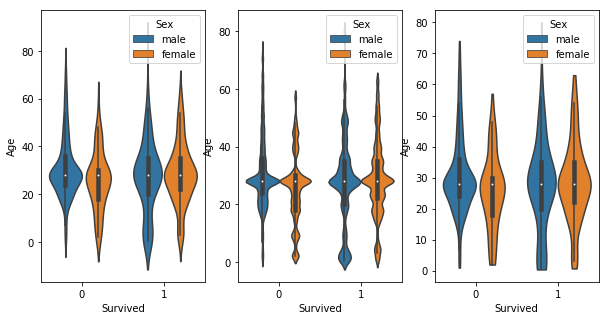

In [117]:

fig, saxis = plt.subplots(1, 3, figsize=(10,5))

sns.catplot(x="Survived", y="Age", hue="Sex",
            kind="violin", data=input_dataframe, ax = saxis[0])
plt.close()

### parameters: bw, cut
sns.catplot(x="Survived", y="Age", hue="Sex",
            kind="violin", data=input_dataframe, bw=0.1, ax = saxis[1])
plt.close()

sns.catplot(x="Survived", y="Age", hue="Sex",
            kind="violin", data=input_dataframe, cut = 0, ax = saxis[2])
plt.close()


# Showing multiple relationships with facets

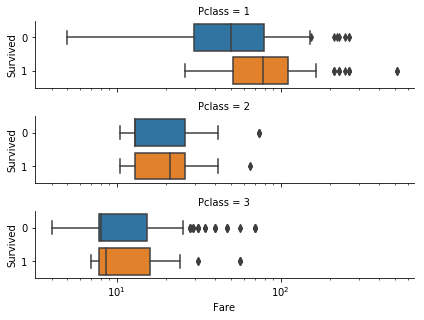

In [121]:
g = sns.catplot(x='Fare', y="Survived", row="Pclass",
                kind="box", orient="h", height=1.5, aspect=4,
                data=input_dataframe.query("Fare > 0"))
g.set(xscale="log")